In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [2]:
#membuat fungsi transfer orde 1 = 0.2083/(s+1.71)

In [3]:
fs10= 10
fs100= 100
fs1000= 1000

In [4]:
# bikin versi 10 Hz
B=[0.2083]
A=[1,1.71]
fs10_z   = signal.bilinear(B,A,fs=10)
fs10_a=fs10_z[1]
fs10_b=fs10_z[0]

In [5]:
fs10_a

array([ 1.        , -0.84246891])

In [6]:
fs10_b

array([0.00959466, 0.00959466])

In [7]:
# H(z)= (0.00959466z + 0.00959466) / (1 - 0.84246891z)

In [8]:
fs10_t,fs10_y=signal.dstep((fs10_b,fs10_a,1/fs10),n=40)

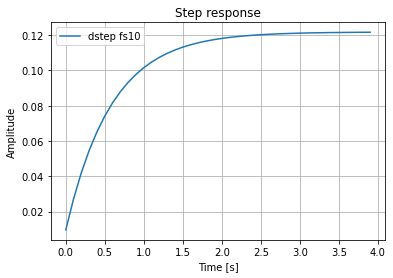

In [9]:
plt.plot(fs10_t,fs10_y[0],label='dstep fs10')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.legend(loc='best')
plt.grid()

In [10]:
# bikin versi 100 Hz

In [11]:
B=[0.2083]
A=[1,1.71]
z   = signal.bilinear(B,A,fs=fs100)
fs100_a=z[1]
fs100_b=z[0]

In [12]:
z

(array([0.00103267, 0.00103267]), array([ 1.        , -0.98304497]))

In [13]:
fs100_t,fs100_y=signal.dstep((fs100_b,fs100_a,1/fs100),n=400)


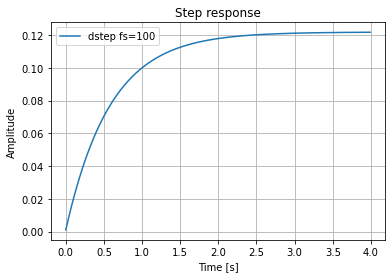

In [14]:
plt.plot(fs100_t,fs100_y[0],label='dstep fs=100')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [15]:
# bikin versi 1000 Hz


In [16]:
B=[0.2083]
A=[1,1.71]
z   = signal.bilinear(B,A,fs=fs1000)
fs1000_a=z[1]
fs1000_b=z[0]

In [17]:
fs1000_t,fs1000_y=signal.dstep((fs1000_b,fs1000_a,1/fs1000),n=4000)


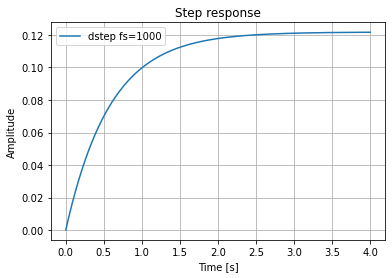

In [18]:
plt.plot(fs1000_t,fs1000_y[0],label='dstep fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [19]:
z

(array([0.00010406, 0.00010406]), array([ 1.        , -0.99829146]))

In [20]:
yn1=0
xn1=0
xn=0
yn=0
sim_t=[]
sim_y=[]
for i in range(0,40):
    t=i*.1
    xn=1.0 # step function
    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
    yn1=yn
    xn1=xn
    print("{:.2f} {:.2f}".format(t,yn))
    sim_t.append(t)
    sim_y.append(yn)
    

0.00 0.01
0.10 0.03
0.20 0.04
0.30 0.05
0.40 0.07
0.50 0.07
0.60 0.08
0.70 0.09
0.80 0.09
0.90 0.10
1.00 0.10
1.10 0.10
1.20 0.11
1.30 0.11
1.40 0.11
1.50 0.11
1.60 0.11
1.70 0.12
1.80 0.12
1.90 0.12
2.00 0.12
2.10 0.12
2.20 0.12
2.30 0.12
2.40 0.12
2.50 0.12
2.60 0.12
2.70 0.12
2.80 0.12
2.90 0.12
3.00 0.12
3.10 0.12
3.20 0.12
3.30 0.12
3.40 0.12
3.50 0.12
3.60 0.12
3.70 0.12
3.80 0.12
3.90 0.12


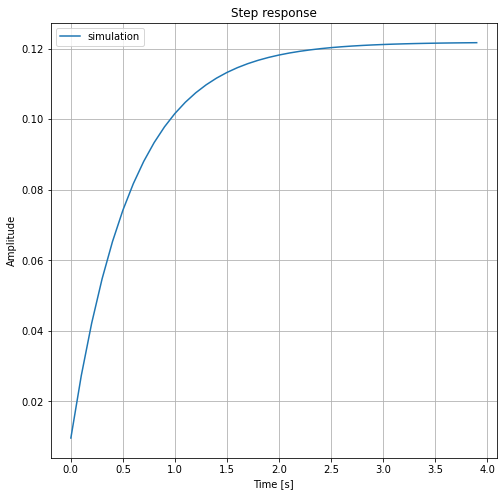

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(sim_t,sim_y,label='simulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [22]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs10_all_t   = []
fs10_all_out = []
dt = 0.1
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    if t>10:
        break        
    error=input-output
    xn=13.71 * error
    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs10_all_t.append(t)
    fs10_all_out.append(output)    

-1.00 0.000 0.000 0.000
-0.90 0.000 0.000 0.000
-0.80 0.000 0.000 0.000
-0.70 0.000 0.000 0.000
-0.60 0.000 0.000 0.000
-0.50 0.000 0.000 0.000
-0.40 0.000 0.000 0.000
-0.30 0.000 0.000 0.000
-0.20 0.000 0.000 0.000
-0.10 0.000 0.000 0.000
0.00 1.000 13.710 0.007
0.10 0.993 13.620 0.032
0.20 0.968 13.274 0.079
0.30 0.921 12.626 0.144
0.40 0.856 11.733 0.223
0.50 0.777 10.650 0.312
0.60 0.688 9.430 0.408
0.70 0.592 8.123 0.506
0.80 0.494 6.774 0.604
0.90 0.396 5.425 0.700
1.00 0.300 4.110 0.791
1.10 0.209 2.859 0.876
1.20 0.124 1.696 0.953
1.30 0.047 0.641 1.021
1.40 -0.021 -0.293 1.080
1.50 -0.080 -1.098 1.129
1.60 -0.129 -1.769 1.168
1.70 -0.168 -2.306 1.198
1.80 -0.198 -2.713 1.219
1.90 -0.219 -2.996 1.231
2.00 -0.231 -3.164 1.235
2.10 -0.235 -3.228 1.233
2.20 -0.233 -3.199 1.225
2.30 -0.225 -3.090 1.213
2.40 -0.213 -2.914 1.196
2.50 -0.196 -2.686 1.176
2.60 -0.176 -2.417 1.155
2.70 -0.155 -2.120 1.132
2.80 -0.132 -1.807 1.108
2.90 -0.108 -1.487 1.085
3.00 -0.085 -1.170 1.063
3.10 -0

In [23]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs100_all_t   = []
fs100_all_out = []
dt = 0.01
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    if t>10:
        break        
        
    error=input-output
    xn=13.71 * error
    yn = yn1 * 0.98304497 + xn * 0.00103267 + xn1 * 0.00103267 
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs100_all_t.append(t)
    fs100_all_out.append(output)    

-1.00 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.95 0.000 0.000 0.000
-0.94 0.000 0.000 0.000
-0.93 0.000 0.000 0.000
-0.92 0.000 0.000 0.000
-0.91 0.000 0.000 0.000
-0.90 0.000 0.000 0.000
-0.89 0.000 0.000 0.000
-0.88 0.000 0.000 0.000
-0.87 0.000 0.000 0.000
-0.86 0.000 0.000 0.000
-0.85 0.000 0.000 0.000
-0.84 0.000 0.000 0.000
-0.83 0.000 0.000 0.000
-0.82 0.000 0.000 0.000
-0.81 0.000 0.000 0.000
-0.80 0.000 0.000 0.000
-0.79 0.000 0.000 0.000
-0.78 0.000 0.000 0.000
-0.77 0.000 0.000 0.000
-0.76 0.000 0.000 0.000
-0.75 0.000 0.000 0.000
-0.74 0.000 0.000 0.000
-0.73 0.000 0.000 0.000
-0.72 0.000 0.000 0.000
-0.71 0.000 0.000 0.000
-0.70 0.000 0.000 0.000
-0.69 0.000 0.000 0.000
-0.68 0.000 0.000 0.000
-0.67 0.000 0.000 0.000
-0.66 0.000 0.000 0.000
-0.65 0.000 0.000 0.000
-0.64 0.000 0.000 0.000
-0.63 0.000 0.000 0.000
-0.62 0.000 0.000 0.000
-0.61 0.000 0.000 0.000
-0.60 0.000 0.000 0.000
-0.59 0.000 0.00

In [24]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs1000_all_t   = []
fs1000_all_out = []
dt = 0.001
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    error=input-output
    xn=13.71 * error
    
#    xn=1.0 # step function
#    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
#    yn = yn1 * 0.98304497 + xn * 0.00103267 + xn1 * 0.00103267 
    yn = yn1 * 0.99829146 + xn * 0.00010406 + xn1 * 0.00010406     
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs1000_all_t.append(t)
    fs1000_all_out.append(output)    

-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.00

1.79 -0.123 -1.691 1.124
1.79 -0.124 -1.694 1.124
1.79 -0.124 -1.697 1.124
1.80 -0.124 -1.700 1.124
1.80 -0.124 -1.703 1.124
1.80 -0.124 -1.706 1.125
1.80 -0.125 -1.709 1.125
1.80 -0.125 -1.711 1.125
1.80 -0.125 -1.714 1.125
1.80 -0.125 -1.717 1.125
1.80 -0.125 -1.720 1.126
1.80 -0.126 -1.723 1.126
1.81 -0.126 -1.726 1.126
1.81 -0.126 -1.728 1.126
1.81 -0.126 -1.731 1.126
1.81 -0.126 -1.734 1.127
1.81 -0.127 -1.737 1.127
1.81 -0.127 -1.740 1.127
1.81 -0.127 -1.742 1.127
1.81 -0.127 -1.745 1.127
1.81 -0.127 -1.748 1.128
1.81 -0.128 -1.751 1.128
1.81 -0.128 -1.753 1.128
1.82 -0.128 -1.756 1.128
1.82 -0.128 -1.759 1.128
1.82 -0.128 -1.761 1.129
1.82 -0.129 -1.764 1.129
1.82 -0.129 -1.767 1.129
1.82 -0.129 -1.769 1.129
1.82 -0.129 -1.772 1.129
1.82 -0.129 -1.775 1.130
1.82 -0.130 -1.777 1.130
1.83 -0.130 -1.780 1.130
1.83 -0.130 -1.782 1.130
1.83 -0.130 -1.785 1.130
1.83 -0.130 -1.788 1.131
1.83 -0.131 -1.790 1.131
1.83 -0.131 -1.793 1.131
1.83 -0.131 -1.795 1.131
1.83 -0.131 -1.798 1.131


4.75 0.020 0.275 0.980
4.75 0.020 0.275 0.980
4.75 0.020 0.275 0.980
4.75 0.020 0.274 0.980
4.75 0.020 0.274 0.980
4.75 0.020 0.274 0.980
4.75 0.020 0.274 0.980
4.75 0.020 0.273 0.980
4.75 0.020 0.273 0.980
4.75 0.020 0.273 0.980
4.75 0.020 0.272 0.980
4.76 0.020 0.272 0.980
4.76 0.020 0.272 0.980
4.76 0.020 0.272 0.980
4.76 0.020 0.271 0.980
4.76 0.020 0.271 0.980
4.76 0.020 0.271 0.980
4.76 0.020 0.270 0.980
4.76 0.020 0.270 0.980
4.76 0.020 0.270 0.980
4.76 0.020 0.270 0.980
4.77 0.020 0.269 0.980
4.77 0.020 0.269 0.980
4.77 0.020 0.269 0.980
4.77 0.020 0.268 0.980
4.77 0.020 0.268 0.980
4.77 0.020 0.268 0.980
4.77 0.020 0.268 0.981
4.77 0.019 0.267 0.981
4.77 0.019 0.267 0.981
4.78 0.019 0.267 0.981
4.78 0.019 0.266 0.981
4.78 0.019 0.266 0.981
4.78 0.019 0.266 0.981
4.78 0.019 0.266 0.981
4.78 0.019 0.265 0.981
4.78 0.019 0.265 0.981
4.78 0.019 0.265 0.981
4.78 0.019 0.264 0.981
4.78 0.019 0.264 0.981
4.79 0.019 0.264 0.981
4.79 0.019 0.264 0.981
4.79 0.019 0.263 0.981
4.79 0.019 

7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.34 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.022 1.002
7.35 -0.002 -0.021 1.002
7.35 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.36 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.002
7.37 -0.002 -0.021 1.001
7.37 -0.001 -0.021 1.001
7.37 -0.001 -0.021 1.001
7.37 -0.001 -0.020 1.001
7.38 -0.001 -0.020 1.001
7.38 -0.001 -0.020 1.001
7.38 -0.001 -0.020 1.001


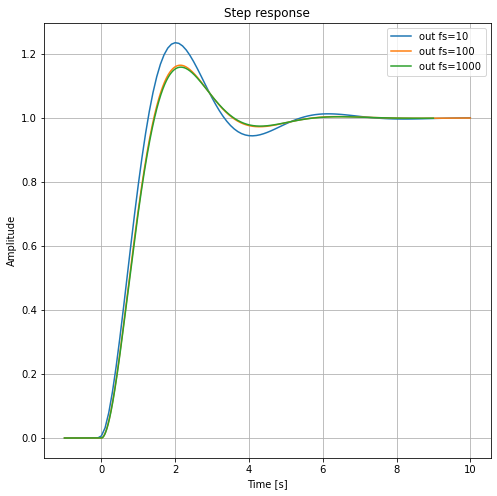

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(fs10_all_t,fs10_all_out,label='out fs=10')
plt.plot(fs100_all_t,fs100_all_out,label='out fs=100')
plt.plot(fs1000_all_t,fs1000_all_out,label='out fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [26]:
yn1=0
yn2=0
xn1=0
xn2=0
y=0
times  = []
output = []
for i in range (0,100):
    t=i*0.1-1
    if t<0:
        input=0
    else:
        input=1
    error=input-y
    x=13.71 * error
    y = 1.843 * yn1 - 0.843 * yn2 + 9.846e-4 * xn1 + 9.30447e-4 * xn2
    xn2=xn1
    xn1=x
    yn2=yn1
    yn1=y
    
    print ("{} {:.3f} {:.3f} {:.3f}".format(i,t,x,y))
    
    output.append(y)
    times.append(t)

0 -1.000 0.000 0.000
1 -0.900 0.000 0.000
2 -0.800 0.000 0.000
3 -0.700 0.000 0.000
4 -0.600 0.000 0.000
5 -0.500 0.000 0.000
6 -0.400 0.000 0.000
7 -0.300 0.000 0.000
8 -0.200 0.000 0.000
9 -0.100 0.000 0.000
10 0.000 13.710 0.000
11 0.100 13.710 0.013
12 0.200 13.525 0.051
13 0.300 13.009 0.109
14 0.400 12.217 0.183
15 0.500 11.200 0.270
16 0.600 10.013 0.365
17 0.700 8.705 0.466
18 0.800 7.324 0.569
19 0.900 5.915 0.671
20 1.000 4.517 0.769
21 1.100 3.165 0.862
22 1.200 1.889 0.948
23 1.300 0.714 1.025
24 1.400 -0.344 1.093
25 1.500 -1.269 1.150
26 1.600 -2.053 1.196
27 1.700 -2.692 1.233
28 1.800 -3.188 1.258
29 1.900 -3.543 1.275
30 2.000 -3.764 1.282
31 2.100 -3.863 1.281
32 2.200 -3.850 1.273
33 2.300 -3.739 1.259
34 2.400 -3.544 1.239
35 2.500 -3.280 1.216
36 2.600 -2.962 1.190
37 2.700 -2.605 1.162
38 2.800 -2.222 1.133
39 2.900 -1.825 1.104
40 3.000 -1.428 1.076
41 3.100 -1.041 1.049
42 3.200 -0.671 1.024
43 3.300 -0.328 1.001
44 3.400 -0.016 0.981
45 3.500 0.260 0.964
46 3.6

In [27]:
 #baca file excel, perioda = 0.1s

In [52]:
# import pandas lib as pd
import pandas as pd
# read by default 1st sheet of an excel file
df = pd.read_excel('zoh.xlsx') 
print(df)
fs10_df=df

     time  PID Controller:1  Step:1     Sum:1  Transfer Fcn:1  time.1  \
0     0.0          0.000000       0  0.000000        0.000000     0.0   
1     0.1          0.000000       0  0.000000        0.000000     0.1   
2     0.2          0.000000       0  0.000000        0.000000     0.2   
3     0.3          0.000000       0  0.000000        0.000000     0.3   
4     0.4          0.000000       0  0.000000        0.000000     0.4   
..    ...               ...     ...       ...             ...     ...   
98    9.6          0.013835       1  0.001064        0.998936     9.8   
99    9.7          0.014081       1  0.001083        0.998917     9.9   
100   9.8          0.013940       1  0.001072        0.998928    10.0   
101   9.9          0.013473       1  0.001036        0.998964     NaN   
102  10.0          0.012738       1  0.000980        0.999020     NaN   

     Zero-Order Hold:1  
0             0.000000  
1             0.000000  
2             0.000000  
3             0.000000 

In [53]:
df['time']

0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
       ... 
98      9.6
99      9.7
100     9.8
101     9.9
102    10.0
Name: time, Length: 103, dtype: float64

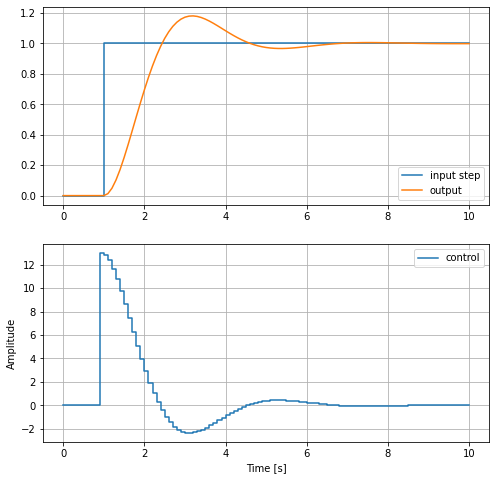

In [54]:
#plt.figure(figsize=(8, 8))
figure, axis = plt.subplots(2, 1, figsize=(8, 8)) 
axis[0].plot(df['time'],df['Step:1'],label='input step')
axis[0].plot(df['time'],df['Transfer Fcn:1'],label='output')
axis[0].grid()
axis[0].legend(loc='best')
axis[1].step(df['time.1'],df['Zero-Order Hold:1'],label='control')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
figure.savefig("chapter13-fs10.jpg",dpi=300)

In [82]:
# perioda = 1 s

In [83]:
# read by default 1st sheet of an excel file
fs1_df = pd.read_excel('zoh-fs-1.xlsx') 
print(fs1_df)
df = fs1_df

    time  PID Controller:1  Step:1     Sum:1  Transfer Fcn:1  time.1  \
0    0.0          0.000000       0  0.000000        0.000000     0.0   
1    0.4          0.000000       0  0.000000        0.000000     1.0   
2    0.8          0.000000       0  0.000000        0.000000     2.0   
3    1.0          0.000000       0  0.000000        0.000000     3.0   
4    1.0         13.000000       1  1.000000        0.000000     4.0   
..   ...               ...     ...       ...             ...     ...   
59  18.8          0.114350       1  0.008796        0.991204     NaN   
60  19.0          0.184966       1  0.014228        0.985772     NaN   
61  19.4          0.253554       1  0.019504        0.980496     NaN   
62  19.8          0.230127       1  0.017702        0.982298     NaN   
63  20.0          0.199205       1  0.015323        0.984677     NaN   

    Zero-Order Hold:1  
0            0.000000  
1           13.000000  
2            2.274929  
3           -7.679383  
4           -4.

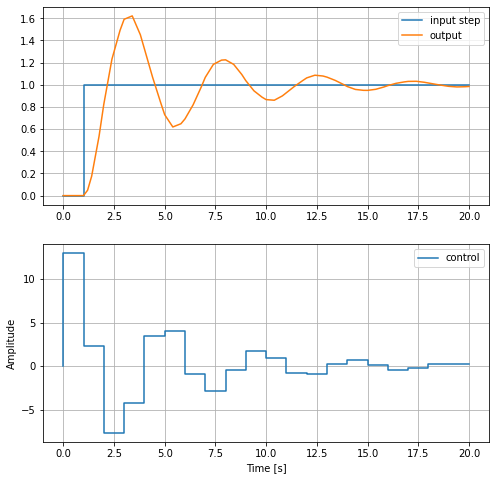

In [84]:
#plt.figure(figsize=(8, 8))
figure, axis = plt.subplots(2, 1, figsize=(8, 8)) 
axis[0].plot(df['time'],df['Step:1'],label='input step')
axis[0].plot(df['time'],df['Transfer Fcn:1'],label='output')
axis[0].grid()
axis[0].legend(loc='best')
axis[1].step(df['time.1'],df['Zero-Order Hold:1'],label='control')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
figure.savefig("chapter13-fs1.jpg",dpi=300)

In [ ]:
# kendali-fs-3.xlsx

In [77]:
# read by default 1st sheet of an excel file
fs3_df = pd.read_excel('kendali-fs-3.xlsx') 
print(fs3_df)
df = fs3_df

         time  PID Controller:1  Step:1       Sum:1  Transfer Fcn:1  time.1  \
0    0.000000          0.000000       0    0.000000        0.000000     0.0   
1    0.400000          0.000000       0    0.000000        0.000000     3.0   
2    0.800000          0.000000       0    0.000000        0.000000     6.0   
3    1.000000          0.000000       0    0.000000        0.000000     9.0   
4    1.000000         13.000000       1    1.000000        0.000000    12.0   
5    1.000000         13.000000       1    1.000000        0.000000    15.0   
6    1.400000         13.000000       1    1.000000        0.000000    18.0   
7    1.800000         13.000000       1    1.000000        0.000000     NaN   
8    2.200000         13.000000       1    1.000000        0.000000     NaN   
9    2.600000         13.000000       1    1.000000        0.000000     NaN   
10   3.000000         13.000000       1    1.000000        0.000000     NaN   
11   3.400000         10.729048       1    0.825311 

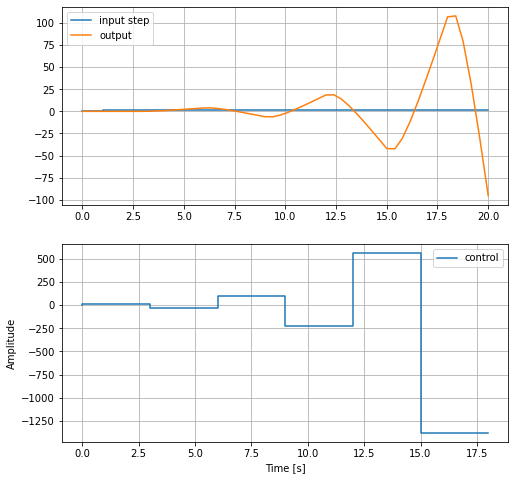

In [81]:
#plt.figure(figsize=(8, 8))
figure, axis = plt.subplots(2, 1, figsize=(8, 8)) 
axis[0].plot(df['time'],df['Step:1'],label='input step')
axis[0].plot(df['time'],df['Transfer Fcn:1'],label='output')
axis[0].grid()
axis[0].legend(loc='best')
axis[1].step(df['time.1'],df['Zero-Order Hold:1'],label='control')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
figure.savefig("chapter13-fs3.jpg",dpi=300)

In [72]:
# read by default 1st sheet of an excel file
df = pd.read_excel('kendali-nozoh.xlsx') 
print(df)
fs0_df=df

         time  PID Controller:1  Step:1         Sum:1  Transfer Fcn:1
0    0.000000      0.000000e+00       0  0.000000e+00    0.000000e+00
1    0.400000      0.000000e+00       0  0.000000e+00    0.000000e+00
2    0.800000      0.000000e+00       0  0.000000e+00    0.000000e+00
3    1.000000      0.000000e+00       0  0.000000e+00    0.000000e+00
4    1.000000      1.300000e+01       1  1.000000e+00    0.000000e+00
5    1.000000      1.300000e+01       1  1.000000e+00    2.761454e-28
6    1.400000      1.080686e+01       1  8.312966e-01    1.687034e-01
7    1.740195      7.113149e+00       1  5.471653e-01    4.528347e-01
8    2.140195      2.822652e+00       1  2.171271e-01    7.828729e-01
9    2.540195     -1.968475e-01       1 -1.514212e-02    1.015142e+00
10   2.940195     -1.660982e+00       1 -1.277679e-01    1.127768e+00
11   3.340195     -1.897054e+00       1 -1.459272e-01    1.145927e+00
12   3.740195     -1.441954e+00       1 -1.109195e-01    1.110920e+00
13   4.140195     -7

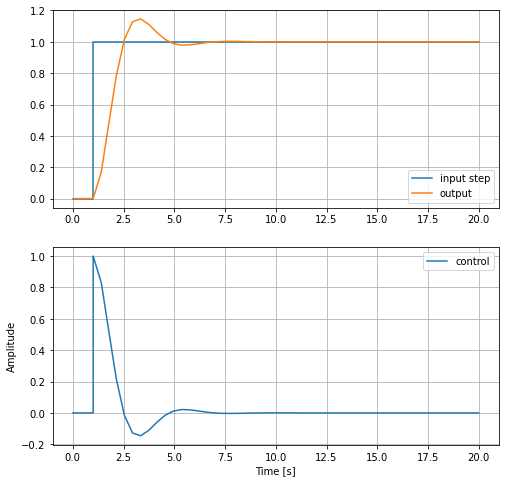

In [73]:
#plt.figure(figsize=(8, 8))
figure, axis = plt.subplots(2, 1, figsize=(8, 8)) 
axis[0].plot(df['time'],df['Step:1'],label='input step')
axis[0].plot(df['time'],df['Transfer Fcn:1'],label='output')
axis[0].grid()
axis[0].legend(loc='best')
axis[1].plot(df['time'],df['Sum:1'],label='control')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
figure.savefig("chapter13-nozoh.jpg",dpi=300)

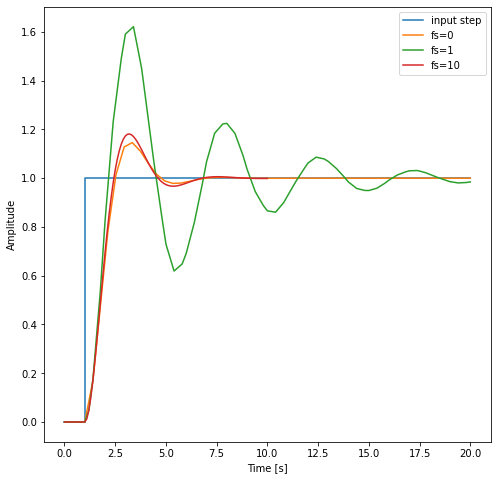

In [85]:
# plot gabungan
#plt.figure(figsize=(8, 8))
figure = plt.figure(figsize=(8, 8)) 
plt.plot(df['time'],df['Step:1'],label='input step')

## plt.plot(df['time'],df['Transfer Fcn:1'],label='output')

plt.plot(fs0_df['time'],fs0_df['Transfer Fcn:1'],label='fs=0')
plt.plot(fs1_df['time'],fs1_df['Transfer Fcn:1'],label='fs=1')
plt.plot(fs10_df['time'],fs10_df['Transfer Fcn:1'],label='fs=10')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend(loc='best')
figure.savefig("chapter13-combine.jpg",dpi=300)

In [62]:
len(axis)

2